In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./HMEQ.csv", encoding = 'euc=kr')

In [33]:
# 그래픽 한글폰트 적용
matplotlib.rc("font", family = "NanumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [34]:
def fun_data_layout(v_data): 
    print("Data 구조 : ", v_data.shape)
    print()
    
    print("변수 : ", v_data.columns)
    print()

In [35]:
fun_data_layout(df_raw)
df_raw.BAD.value_counts(normalize = True)
df_raw.isnull().sum(axis = 0)
df_raw.JOB.unique()
df_raw.REASON.unique()

Data 구조 :  (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')



array(['HomeImp', 'DebtCon'], dtype=object)

In [36]:
# fillna: 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace: fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

df_raw.isnull().sum()

/tmp/ipykernel_451/2907708905.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace = True)


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [11]:
df_raw_dummy=pd.get_dummies(df_raw)

df_raw_y = df_raw_dummy["BAD"]
df_raw_x = df_raw_dummy.drop("BAD",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (2248, 18)
train dzta Y size : (2248,)
test dzta X size : (1500, 18)
test dzta Y size : (1500,)


In [12]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.909
Accuracy on test set: 0.907


In [13]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


#### C

In [37]:
train_accuracy = []; test_accuracy = []

para_c = [10 ** c for c in range(-2,3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [38]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.909,0.907
1,0.10,0.909,0.907
2,1.00,0.909,0.907
3,10.00,0.909,0.907
4,100.00,0.909,0.907


In [ ]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

#### gamma

In [17]:
train_accuracy = []; test_accuracy = []

para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [18]:
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,1.0,0.9067
1,0.10,1.0,0.9067
2,1.00,1.0,0.9067
3,10.00,1.0,0.9067


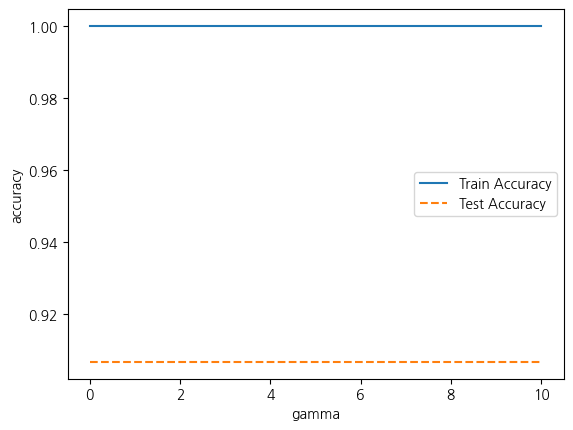

In [19]:
plt.plot(para_gamma, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

### Scale 변환

In [20]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [21]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (2248, 18)
test data X size : (1500, 18)


#### Scale 조절 후 SVC 재실행

In [22]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.943
Accuracy on test set: 0.931


In [23]:
train_accuracy = []; test_accuracy = []

para_c = [c ** 0.1 for c in range(1,21)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_c= pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAcuuracy"] = test_accuracy

In [24]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAcuuracy
0,1.000,0.943,0.931
1,1.072,0.944,0.931
2,1.116,0.944,0.932
3,1.149,0.944,0.932
4,1.175,0.945,0.932
5,1.196,0.945,0.932
6,1.215,0.946,0.932
7,1.231,0.947,0.932
8,1.246,0.947,0.932
9,1.259,0.947,0.932


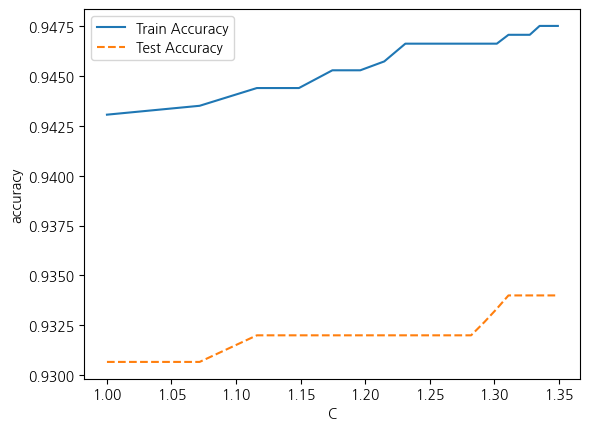

In [25]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [26]:
train_accuracy = []; test_accuracy = []

para_gamma = [0.05 ** gamma for gamma in range(1,15)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma,C = 1.3, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [27]:
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.050,0.944,0.932
1,0.003,0.916,0.910
2,0.000,0.909,0.907
3,0.000,0.909,0.907
4,0.000,0.909,0.907
5,0.000,0.909,0.907
6,0.000,0.909,0.907
7,0.000,0.909,0.907
8,0.000,0.909,0.907
9,0.000,0.909,0.907


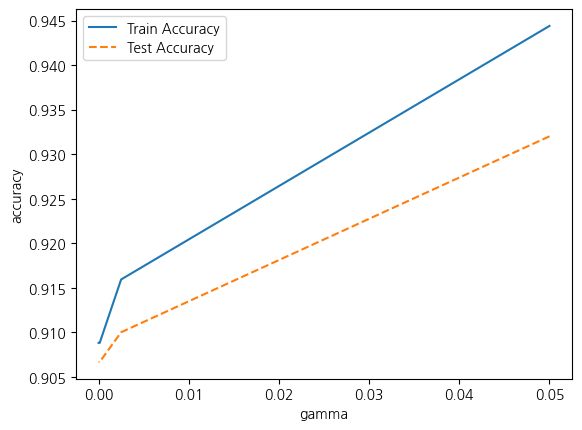

In [28]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

In [29]:
svc_final = SVC(gamma = 0.15, C = 1.3, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))

print("Accuracy on test set: {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))

print("Confusion matrix : \n".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 0.974
Accuracy on test set: 0.940
Confusion matrix : 

              precision    recall  f1-score   support

           0      0.938     1.000     0.968      1360
           1      1.000     0.357     0.526       140

    accuracy                          0.940      1500
   macro avg      0.969     0.679     0.747      1500
weighted avg      0.944     0.940     0.927      1500



In [30]:
estimator = SVC(random_state = 1234)

param_grid = {'C':para_c,
              'gamma':para_gamma}

grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs= -1)
grid_rf.fit(df_scaled_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=1.3020054543174677, gamma=0.05, random_state=1234)

best parameter: 
{'C': 1.3020054543174677, 'gamma': 0.05}

best score: 
0.932
